In [229]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense,Flatten,Dropout
from keras.utils import to_categorical
import numpy as np
# from keras.optimize
# from keras.activations import 

In [144]:
(trainData,trainLabel),(testData,testLabel) = fashion_mnist.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandals','Shirt','Sneaker','Bag','Ankle boot']
# from keras.utils import data_utils
# data_utils.get_index(5,fashion_mnist[5])
trainData = trainData/255
teestData = testData/255
# trainLabel = to_categorical(trainLabel)
# testLabel = to_categorical(testLabel)
trainLabel[0]

9

In [89]:
# np.expand_dims(trainLabel,axis=0)

# dir(np)

(10,)

In [168]:
def plotImage(imgData,label=None,actualIndex=None):
    plt.imshow(imgData, cmap=plt.cm.binary)
    if(actualIndex!=None):
        plt.xlabel('actual=> '+str(class_names[actualIndex]))
    if(label!=None):
        plt.title(class_names[label])
    plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

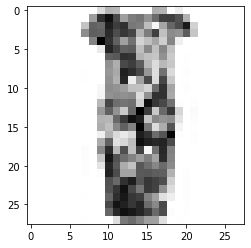

In [91]:
plotImage(testData[100],testLabel[100])

In [63]:
# CREATE THE MODEL

In [195]:
model = Sequential([
    Dense(32,input_shape=(28,28)),
    Flatten(),
    Dense(123,activation='relu'),
    Dropout(rate=0.025),
    Dense(30, activation='relu'),
    Dense(40,activation='relu'),
#     Dense(330,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 28, 32)            928       
_________________________________________________________________
flatten_14 (Flatten)         (None, 896)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 123)               110331    
_________________________________________________________________
dropout_3 (Dropout)          (None, 123)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 30)                3720      
_________________________________________________________________
dense_49 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_50 (Dense)             (None, 10)              

In [196]:
model.fit(trainData,trainLabel,epochs=10,batch_size=20)
model.evaluate(testData,testLabel)

Epoch 1/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.4660 - accuracy: 0.8314
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.3389 - accuracy: 0.8758
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3022 - accuracy: 0.8881
Epoch 4/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.2752 - accuracy: 0.8975
Epoch 5/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2574 - accuracy: 0.9043
Epoch 6/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2387 - accuracy: 0.9113
Epoch 7/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2235 - accuracy: 0.9168
Epoch 8/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2092 - accuracy: 0.9217
Epoch 9/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1961 - accuracy: 0.9280
Epoch 10/10
10000/10000 [==============================

[66.63944263153076, 0.8439000248908997]

In [226]:
idx = 8098
p = model.predict([[testData[idx]]])
print(p)
print(np.argmax(p))

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5


In [227]:
print(testLabel[idx])
print(class_names[testLabel[idx]])

5
Sandals


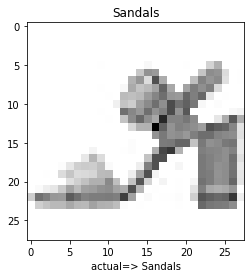

In [228]:
plotImage(testData[idx],np.argmax(p),testLabel[idx])
# class_names[5]

In [159]:
class_names[np.argmax(testLabel[idx])]

'T-shirt/top'

In [209]:
model.save('./digitsModels/fashion_mnistModel.h5')

In [230]:
oldModel = load_model('./digitsModels/fashion_mnistModel.h5')

In [240]:
idx = 899
p = oldModel.predict([[trainData[idx]]])
print(p)
print(np.argmax(p))

[[1.4674709e-16 7.8110519e-27 5.9294658e-22 4.0218205e-23 1.3901593e-22
  9.9999988e-01 4.4339269e-20 1.1412565e-07 6.3193569e-13 1.9196658e-11]]
5


In [241]:
print(trainLabel[idx])
print(class_names[trainLabel[idx]])

5
Sandals


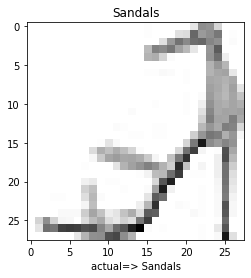

In [242]:
plotImage(trainData[idx],np.argmax(p),trainLabel[idx])